In [24]:
# Step 1. Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Step 2. Load data
df = pd.read_csv("snap_qc_data_2017to2023.csv", encoding = "latin1")

# Step 3. Keep only needed columns
keep_cols = ['State', 'Year', 'Error Nature']
df = df[keep_cols].copy()

# Step 4. Drop missing values & clean datatypes
df = df.dropna(subset=['State', 'Year', 'Error Nature'])
df['Year'] = df['Year'].astype(int)

print("Cleaned data shape:", df.shape)
print(df.head())



Cleaned data shape: (59457, 3)
         State  Year                                       Error Nature
0  Connecticut  2017  More income received from this source than bud...
1  Connecticut  2017   Deduction that should have been included was not
3  Connecticut  2017  More income received from this source than bud...
8  Connecticut  2017       Deduction included that should not have been
9  Connecticut  2017       Deduction included that should not have been


C:\Users\27311\AppData\Local\Temp\ipykernel_31416\2445669323.py:32: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.tight_layout()
C:\Users\27311\AppData\Local\Temp\ipykernel_31416\2445669323.py:32: UserWarning: Glyph 153 (\x99) missing from current font.
  plt.tight_layout()
D:\soft\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\soft\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


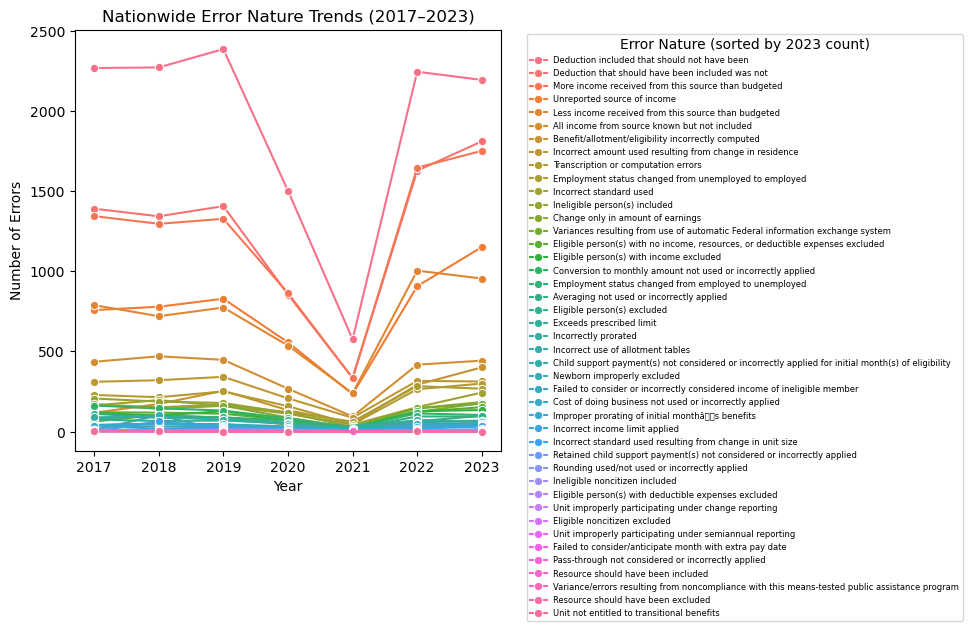

In [30]:
# Step 1. aggregate to national level
agg = df.groupby(['Year', 'Error Nature']).size().reset_index(name='count')

# Step 2. sort legend by last year's total count (e.g., 2023)
last_year = df['Year'].max()
order = (
    agg[agg['Year'] == last_year]
    .sort_values('count', ascending=False)
    ['Error Nature']
    .tolist()
)

# Step 3. rebuild complete year–nature matrix to handle missing years
all_years = range(df['Year'].min(), df['Year'].max() + 1)
agg_full = (
    agg.set_index(['Year', 'Error Nature'])
       .reindex(pd.MultiIndex.from_product([all_years, agg['Error Nature'].unique()],
                                           names=['Year', 'Error Nature']))
       .reset_index()
)

# Step 4. visualize the general trend (legend sorted)
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=agg_full, x='Year', y='count', hue='Error Nature',
    hue_order=order, marker='o'
)
plt.title("Nationwide Error Nature Trends (2017–2023)")
plt.ylabel("Number of Errors")
plt.legend(title=f"Error Nature (sorted by {last_year} count)", fontsize = 6, 
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()